In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

2024-11-01 13:40:41.305878: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-01 13:40:41.332940: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-01 13:40:41.347010: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-01 13:40:41.350681: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-01 13:40:41.362193: I tensorflow/core/platform/cpu_feature_guar

In [2]:
# Load the data
df = pd.read_excel('state_month_overdose.xlsx')
df['Deaths'] = df['Deaths'].apply(lambda x: 0 if x == 'Suppressed' else int(x))
df['Month'] = pd.to_datetime(df['Month'])
df = df.groupby(['Month']).agg({'Deaths': 'sum'}).reset_index()

/tmp/ipykernel_82044/2218601930.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Month'] = pd.to_datetime(df['Month'])


In [3]:
train = df[df['Month'] <= '2020-02-01']
test = df[df['Month'] >= '2020-02-01']

In [4]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset.iloc[i:(i+look_back)].values # Use .values to convert to numpy array
        dataX.append(a)
        dataY.append(dataset.iloc[i + look_back]) # Next value
    return np.array(dataX), np.array(dataY)

In [5]:
look_back = 6  # Choose the desired sequence length
trainX, trainY = create_dataset(train['Deaths'], look_back)
testX, testY = create_dataset(test['Deaths'], look_back)

In [6]:
testX

array([[4696, 5365, 6027],
       [5365, 6027, 7419],
       [6027, 7419, 6307],
       [7419, 6307, 6343],
       [6307, 6343, 6165],
       [6343, 6165, 5683],
       [6165, 5683, 5613],
       [5683, 5613, 5613]])

In [7]:
trainX = trainX.reshape(trainX.shape[0], trainX.shape[1], 1)
testX = testX.reshape(testX.shape[0], testX.shape[1], 1)

In [8]:
testX[0]

array([[4696],
       [5365],
       [6027]])

In [9]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=1)

I0000 00:00:1730482845.281936   82044 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-01 13:40:45.397182: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/home/sukikrishna/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 18353034.0000
Epoch 2/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11324388.0000
Epoch 3/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5565400.0000
Epoch 4/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 161486.5781
Epoch 5/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 33370.3164
Epoch 6/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 26832.1934
Epoch 7/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 56662.4922 
Epoch 8/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 47280.6602
Epoch 9/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 36209.0625
Epoch 10/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 42531.7070
Epoch 11/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 35231.9805
Epoch 12/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 42590.4805
Epoch 13/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 51184.1055
Epoch 14/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 34482.2695
Epoch

In [10]:
trainX.shape

(59, 3, 1)

In [11]:
trainX[0].shape

(3, 1)

In [12]:
tst = np.array(train['Deaths'][-look_back:]).reshape((3,1))
tst.shape

(3, 1)

In [13]:
tst = np.array([tst])
tst.shape

(1, 3, 1)

In [14]:
model.predict(tst)[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


4749.7964

In [55]:
trainPredict = model.predict(trainX)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [56]:
len(trainX)

59

In [57]:
len(trainPredict)

59

In [46]:
def generate_forecast(model, initial_sequence, num_predictions=12, look_back):
    predictions = []
    for_model = initial_sequence
    
    for _ in range(num_predictions):
        # Generate the next prediction
        pred = model.predict(for_model)
        predictions.append(pred[0][0])
        
        # Update the input for the next prediction
        # We need to construct a new input array of the same shape as the original input
        new_input = np.append(for_model[:, 1:], pred[0][0])  # Shift and append the new prediction
        for_model = new_input.reshape((1, look_back, 1))

    return np.array(predictions)

In [62]:
# Prepare initial sequence for prediction
initial_sequence = np.array(train['Deaths'][-look_back:]).reshape((look_back, 1))
initial_sequence = np.array([initial_sequence])
# num_test_predictions = len(testX)  # Number of predictions you want to generate

In [63]:
initial_sequence

array([[[4645],
        [4727],
        [4696]]])

In [64]:
initial_sequence.shape

(1, 3, 1)

In [65]:
# df['Deaths'][61-3+1:61+3]

In [66]:
# predictions = []
# for_model = initial_sequence
# pred = model.predict(for_model)
# predictions.append(pred[0][0])

# np.append(for_model[:, 1:], pred[0][0]).reshape((1,3,1))

In [68]:
testPredict = generate_forecast(model, initial_sequence, look_back)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [69]:
trainPredict

array([[2786.8418],
       [2825.1868],
       [2894.6765],
       [2817.2715],
       [2768.863 ],
       [2755.7808],
       [2851.636 ],
       [2935.4612],
       [2928.8113],
       [2846.9158],
       [2864.5925],
       [3095.4946],
       [3434.929 ],
       [3632.9026],
       [3655.4631],
       [3539.2266],
       [3536.1367],
       [3605.4253],
       [3655.5837],
       [3647.4019],
       [3695.1238],
       [3857.6316],
       [4072.3977],
       [4198.4717],
       [4235.358 ],
       [4167.631 ],
       [4193.9927],
       [4106.7686],
       [4069.0535],
       [4025.4387],
       [4049.642 ],
       [4012.81  ],
       [3941.786 ],
       [3926.5706],
       [3997.9863],
       [3968.6956],
       [3965.5942],
       [3978.1387],
       [4094.1113],
       [4072.447 ],
       [4125.681 ],
       [4122.3237],
       [4070.9946],
       [4024.1965],
       [3924.9119],
       [3921.5144],
       [3916.9155],
       [3939.673 ],
       [3997.3445],
       [4051.9927],


In [70]:
testPredict

array([4749.7964, 4780.294 , 4799.4297, 4835.1094, 4862.91  , 4891.217 ,
       4922.182 , 4951.395 , 4981.3506, 5011.722 , 5041.9053, 5072.4546],
      dtype=float32)

In [74]:
combined_array = [0] * look_back + trainPredict.flatten().tolist() + testPredict.flatten().tolist()

In [75]:
len(combined_array) #some extra test predictions included

74

In [76]:
combined_array

[0,
 0,
 0,
 2786.841796875,
 2825.186767578125,
 2894.676513671875,
 2817.271484375,
 2768.863037109375,
 2755.78076171875,
 2851.635986328125,
 2935.461181640625,
 2928.811279296875,
 2846.915771484375,
 2864.592529296875,
 3095.49462890625,
 3434.928955078125,
 3632.902587890625,
 3655.463134765625,
 3539.2265625,
 3536.13671875,
 3605.42529296875,
 3655.583740234375,
 3647.40185546875,
 3695.123779296875,
 3857.631591796875,
 4072.397705078125,
 4198.4716796875,
 4235.35791015625,
 4167.630859375,
 4193.99267578125,
 4106.7685546875,
 4069.053466796875,
 4025.438720703125,
 4049.64208984375,
 4012.81005859375,
 3941.785888671875,
 3926.570556640625,
 3997.986328125,
 3968.695556640625,
 3965.59423828125,
 3978.138671875,
 4094.111328125,
 4072.447021484375,
 4125.68115234375,
 4122.32373046875,
 4070.99462890625,
 4024.196533203125,
 3924.911865234375,
 3921.514404296875,
 3916.91552734375,
 3939.673095703125,
 3997.344482421875,
 4051.99267578125,
 4148.95263671875,
 4098.35302734

In [78]:
df['LSTM Predictions'] = combined_array[:len(df)]

In [79]:
df

,Month,Deaths,LSTM Predictions
0,2015-01-01,2771,0.000000
1,2015-02-01,2627,0.000000
2,2015-03-01,2907,0.000000
3,2015-04-01,2822,2786.841797
4,2015-05-01,2850,2825.186768
...,...,...,...
67,2020-08-01,6165,4891.216797
68,2020-09-01,5683,4922.182129
69,2020-10-01,5613,4951.395020
70,2020-11-01,5613,4981.350586


In [80]:
sarima_model = SARIMAX(train['Deaths'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)
sarima_result = sarima_model.fit(disp=False)
sarima_predictions = sarima_result.predict(start=0, end=len(train) + len(test) - 1, dynamic=False)

In [81]:
len(sarima_predictions)

73

In [82]:
sarima_predictions

0        0.000000
1     2540.838172
2     2673.336257
3     2865.711655
4     2837.851862
         ...     
68    4958.628025
69    5086.221253
70    5029.753481
71    5205.366131
72    5287.342828
Name: predicted_mean, Length: 73, dtype: float64

In [84]:
sarima_result.fittedvalues.values

array([   0.        , 2540.83817244, 2673.33625711, 2865.71165487,
       2837.85186225, 2844.50380374, 2662.1619646 , 2717.83915467,
       2802.29699832, 2911.30211868, 2965.94235397, 2768.89576095,
       4710.85961386, 3158.69936438, 3599.57703756, 3632.38566025,
       3644.10314147, 3274.64698095, 3463.74348495, 3713.97337488,
       3771.49641409, 3611.68684772, 3418.42992653, 3683.68889557,
       4244.81762097, 4712.48764312, 4429.72161517, 4150.05326223,
       3978.6181729 , 3967.91970256, 4210.38112275, 4008.77923495,
       3935.39823395, 4155.91779016, 3888.86331568, 4057.54541701,
       4273.15847868, 3988.4766205 , 3995.4469797 , 3951.26356314,
       3942.14835099, 3885.23740435, 4156.24476788, 4115.03520923,
       4061.19570807, 3880.15783656, 3938.63225601, 3960.90939927,
       4058.55743426, 3800.86471216, 4104.81599504, 4060.75198472,
       4030.26281054, 3981.99715264, 4184.03775424, 4268.1843198 ,
       4267.54512598, 4312.77039929, 4329.68655718, 4763.88554

In [86]:
sarima_predictions[len(train):]

62    5092.554794
63    4860.585533
64    4942.206500
65    4876.638922
66    5016.516000
67    5041.705897
68    4958.628025
69    5086.221253
70    5029.753481
71    5205.366131
72    5287.342828
Name: predicted_mean, dtype: float64

In [87]:
df['SARIMA Predictions'] = np.concatenate([sarima_result.fittedvalues.values, sarima_predictions[len(train):]])[:len(df)]

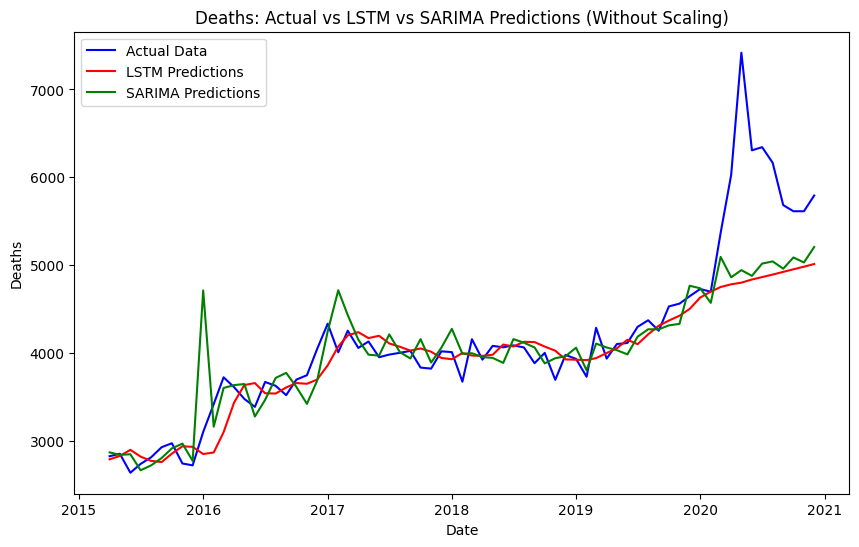

In [89]:
plottable = df.iloc[1:]
plottable.set_index('Month', inplace=True)
plt.figure(figsize=(10, 6))
plt.plot(plottable.index[2:], plottable['Deaths'][2:], label='Actual Data', color='blue')
plt.plot(plottable.index[2:], plottable['LSTM Predictions'][2:], label='LSTM Predictions', color='red')
plt.plot(plottable.index[2:], plottable['SARIMA Predictions'][2:], label='SARIMA Predictions', color='green')
plt.title('Deaths: Actual vs LSTM vs SARIMA Predictions (Without Scaling)')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.legend()
plt.show()

In [92]:
testPredict

array([4749.7964, 4780.294 , 4799.4297, 4835.1094, 4862.91  , 4891.217 ,
       4922.182 , 4951.395 , 4981.3506, 5011.722 , 5041.9053, 5072.4546],
      dtype=float32)

In [94]:
trainScore = np.sqrt(mean_squared_error(trainY, trainPredict))
print('LSTM Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY, testPredict[:len(testY)]))
print('LSTM Test Score: %.2f RMSE' % (testScore))

LSTM Train Score: 199.17 RMSE
LSTM Test Score: 1413.51 RMSE


In [95]:
trainScore = np.sqrt(mean_squared_error(train['Deaths'], sarima_predictions[:len(train)]))
print('SARIMA Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(test['Deaths'], sarima_predictions[len(train):]))
print('SARIMA Test Score: %.2f RMSE' % (testScore))

SARIMA Train Score: 445.49 RMSE
SARIMA Test Score: 1127.48 RMSE
